### Using the Wisconsin breast cancer diagnostic data set for predictive analysis

#### Import the data from Kaggle
follow instruction in this link to set it up https://www.kaggle.com/docs/api#interacting-with-datasets

In [28]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [29]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [30]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


#### Unzip and download datset to the notebook

In [31]:
from zipfile import ZipFile
zf = ZipFile('breast-cancer-wisconsin-data.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

## Begin data preprocessing

In [32]:
# Import of the needed libraires
#graphical librairies
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

#data librairies 

import pandas as pd
import pylab as pl
import numpy as np

from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot
from pandas.plotting import parallel_coordinates

In [33]:
df = pd.read_csv('data.csv')

##### Check if the import went well and see the headers

In [34]:
print(df.keys())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [35]:
print(df['diagnosis'].value_counts())
print("df has", len(df.columns), "columns and", len(df), "rows")

B    357
M    212
Name: diagnosis, dtype: int64
df has 33 columns and 569 rows


##### There are 357 rows with type B and 212 rows with type M 

In [36]:
#### we can check the statistical data of a particular column grouped by interested output: e.g.
df.loc[:, ['radius_mean','diagnosis']].groupby('diagnosis').describe()

radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
B               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
M               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                  
             max  
diagnosis         
B          17.85  
M          28.11

###### Here, it is notable that patients with type M has larger mean radius (but also higher std)

In [37]:
#### check the Unnamed column to see if it contains anything useful
df.loc[:, ['Unnamed: 32','diagnosis']].groupby('diagnosis').describe()

Unnamed: 32                             
                count mean std min 25% 50% 75% max
diagnosis                                         
B                 0.0  NaN NaN NaN NaN NaN NaN NaN
M                 0.0  NaN NaN NaN NaN NaN NaN NaN

##### Just an empty column so it will be cleaned out

In [38]:
#### we can also check correlation between each attribute, diagnosis is excluded automatically
corr_matrix = df.iloc[:,1:32:].corr()

#### However, there is a lot of attribute so we cannot really make any conclusion with our bear eyes

In [39]:
#### We can see ask to only see the correlation when its absolute value more than 0.7, 
#### and set panda display option to show all column
pd.set_option('max_columns', None)
high_corr = corr_matrix[corr_matrix.abs() > 0.7]
high_corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000           NaN        0.997855   0.987357   
texture_mean                     NaN      1.000000             NaN        NaN   
perimeter_mean              0.997855           NaN        1.000000   0.986507   
area_mean                   0.987357           NaN        0.986507   1.000000   
smoothness_mean                  NaN           NaN             NaN        NaN   
compactness_mean                 NaN           NaN             NaN        NaN   
concavity_mean                   NaN           NaN        0.716136        NaN   
concave points_mean         0.822529           NaN        0.850977   0.823269   
symmetry_mean                    NaN           NaN             NaN        NaN   
fractal_dimension_mean           NaN           NaN             NaN        NaN   
radius_se                        NaN           NaN             NaN   0.732562   
texture_se                       NaN           NaN             NaN        NaN   
perimeter_se                     NaN           NaN             NaN   0.726628   
area_se                     0.735864           NaN        0.744983   0.800086   
smoothness_se                    NaN           NaN             NaN        NaN   
compactness_se                   NaN           NaN             NaN        NaN   
concavity_se                     NaN           NaN             NaN        NaN   
concave points_se                NaN           NaN             NaN        NaN   
symmetry_se                      NaN           NaN             NaN        NaN   
fractal_dimension_se             NaN           NaN             NaN        NaN   
radius_worst                0.969539           NaN        0.969476   0.962746   
texture_worst                    NaN      0.912045             NaN        NaN   
perimeter_worst             0.965137           NaN        0.970387   0.959120   
area_worst                  0.941082           NaN        0.941550   0.959213   
smoothness_worst                 NaN           NaN             NaN        NaN   
compactness_worst                NaN           NaN             NaN        NaN   
concavity_worst                  NaN           NaN             NaN        NaN   
concave points_worst        0.744214           NaN        0.771241   0.722017   
symmetry_worst                   NaN           NaN             NaN        NaN   
fractal_dimension_worst          NaN           NaN             NaN        NaN   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                          NaN               NaN             NaN   
texture_mean                         NaN               NaN             NaN   
perimeter_mean                       NaN               NaN        0.716136   
area_mean                            NaN               NaN             NaN   
smoothness_mean                 1.000000               NaN             NaN   
compactness_mean                     NaN          1.000000        0.883121   
concavity_mean                       NaN          0.883121        1.000000   
concave points_mean                  NaN          0.831135        0.921391   
symmetry_mean                        NaN               NaN             NaN   
fractal_dimension_mean               NaN               NaN             NaN   
radius_se                            NaN               NaN             NaN   
texture_se                           NaN               NaN             NaN   
perimeter_se                         NaN               NaN             NaN   
area_se                              NaN               NaN             NaN   
smoothness_se                        NaN               NaN             NaN   
compactness_se                       NaN          0.738722             NaN   
concavity_se                         NaN               NaN             NaN   
concave points_se                    NaN               NaN             NaN   
symmetry_se                    

In [40]:
#### reset the display option to the limit of 20 columns
pd.reset_option('max_columns')

### Data cleaning

In [41]:
#### drop the empty column, and the id column that does not provide any insight
df.drop(['id','Unnamed: 32'], axis = 1, inplace = True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [42]:
#### observe the table to identify if there is any categorical data
pd.set_option('max_columns', None)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

#### No categorical data is found

In [43]:
#### Make sure all data is numeric type, except the output response column
df2 = df.loc[:, df.columns != "diagnosis"]
df2 = df2.apply(pd.to_numeric, errors = 'coerce')
df2.shape

(569, 30)

In [44]:
#### rejoin the numerised df2 to column "diagnosis"
df = pd.concat([df2,df['diagnosis']], axis=1, join='inner')
print(df.keys())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')


#### please note that the diagnosis is now the right most column

In [45]:
#### reset the display option to the limit of 20 columns
pd.reset_option('max_columns')

In [46]:
#### Since we have a rather large sample, any row with NaN value will be drop
df = df.dropna()
df.shape

(569, 31)

#### every row remains so there is no row with NaN in the first place

### Data Visualisation

In [47]:
#defining colours used for visualization of output responses 
colours = np.where(df['diagnosis']=='B','r','-')
colours[df['diagnosis']=='M'] = 'g'

#print(colours)
colour_dict={'B':'r','M':'g'}

#### Firstly, let's Normalise the data

In [48]:
#### we use the StandardScaler from scikit-learn to normalize the data. 
#### This method scales the data so that it has a mean of 0 and a standard deviation of 1

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select all numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Normalize the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [49]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                2.255747  ...      -1.359293         2.303601    2.001237   
1               -0.868652  ...      -0.369203         1.535126    1.890489   
2               -0.398008  ...      -0.023974         1.347475    1.456285   
3                4.910919  ...       0.133984        -0.249939   -0.550021   
4               -0.562450  ...      -1.466770         1.338539    1.220724   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   
4          0.220556          -0.313395         0.613179              0.729259   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0        2.750622                 1.937015          M  
1       -0.243890                 0.281190          M  
2        1.152255                 0.201391          M  
3        6.046041                 4.935010          M  
4       -0.868353                -0.397100          M  

[5 rows x 31 columns]

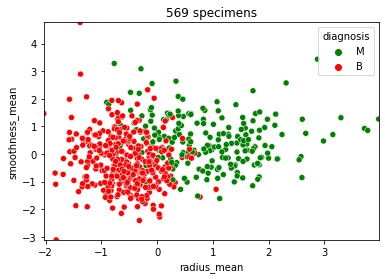

In [50]:
#### we can plot one attribute against another on a scatter plot and use colours to indicate output responses
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='diagnosis', palette=colour_dict, data=df) 
x_size_min = df['radius_mean'].min()
x_size_max = df['radius_mean'].max()
y_size_min = df['smoothness_mean'].min()
y_size_max = df['smoothness_mean'].max()
plt.ylim(y_size_min,y_size_max)
plt.xlim(x_size_min,x_size_max)
plt.title(str(len(df))+" specimens") 
plt.show()

#### This shows that radius_mean may have a strong influence and smoothness_mean might not, but we cannot ignore the interaction effect also

array([[<AxesSubplot:xlabel='radius_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='texture_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='area_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='smoothness_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='compactness_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='concave points_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='symmetry_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='fractal_dimension_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='radius_se', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='texture_se', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='perimeter_se', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='area_se', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='smoothness_se', yl

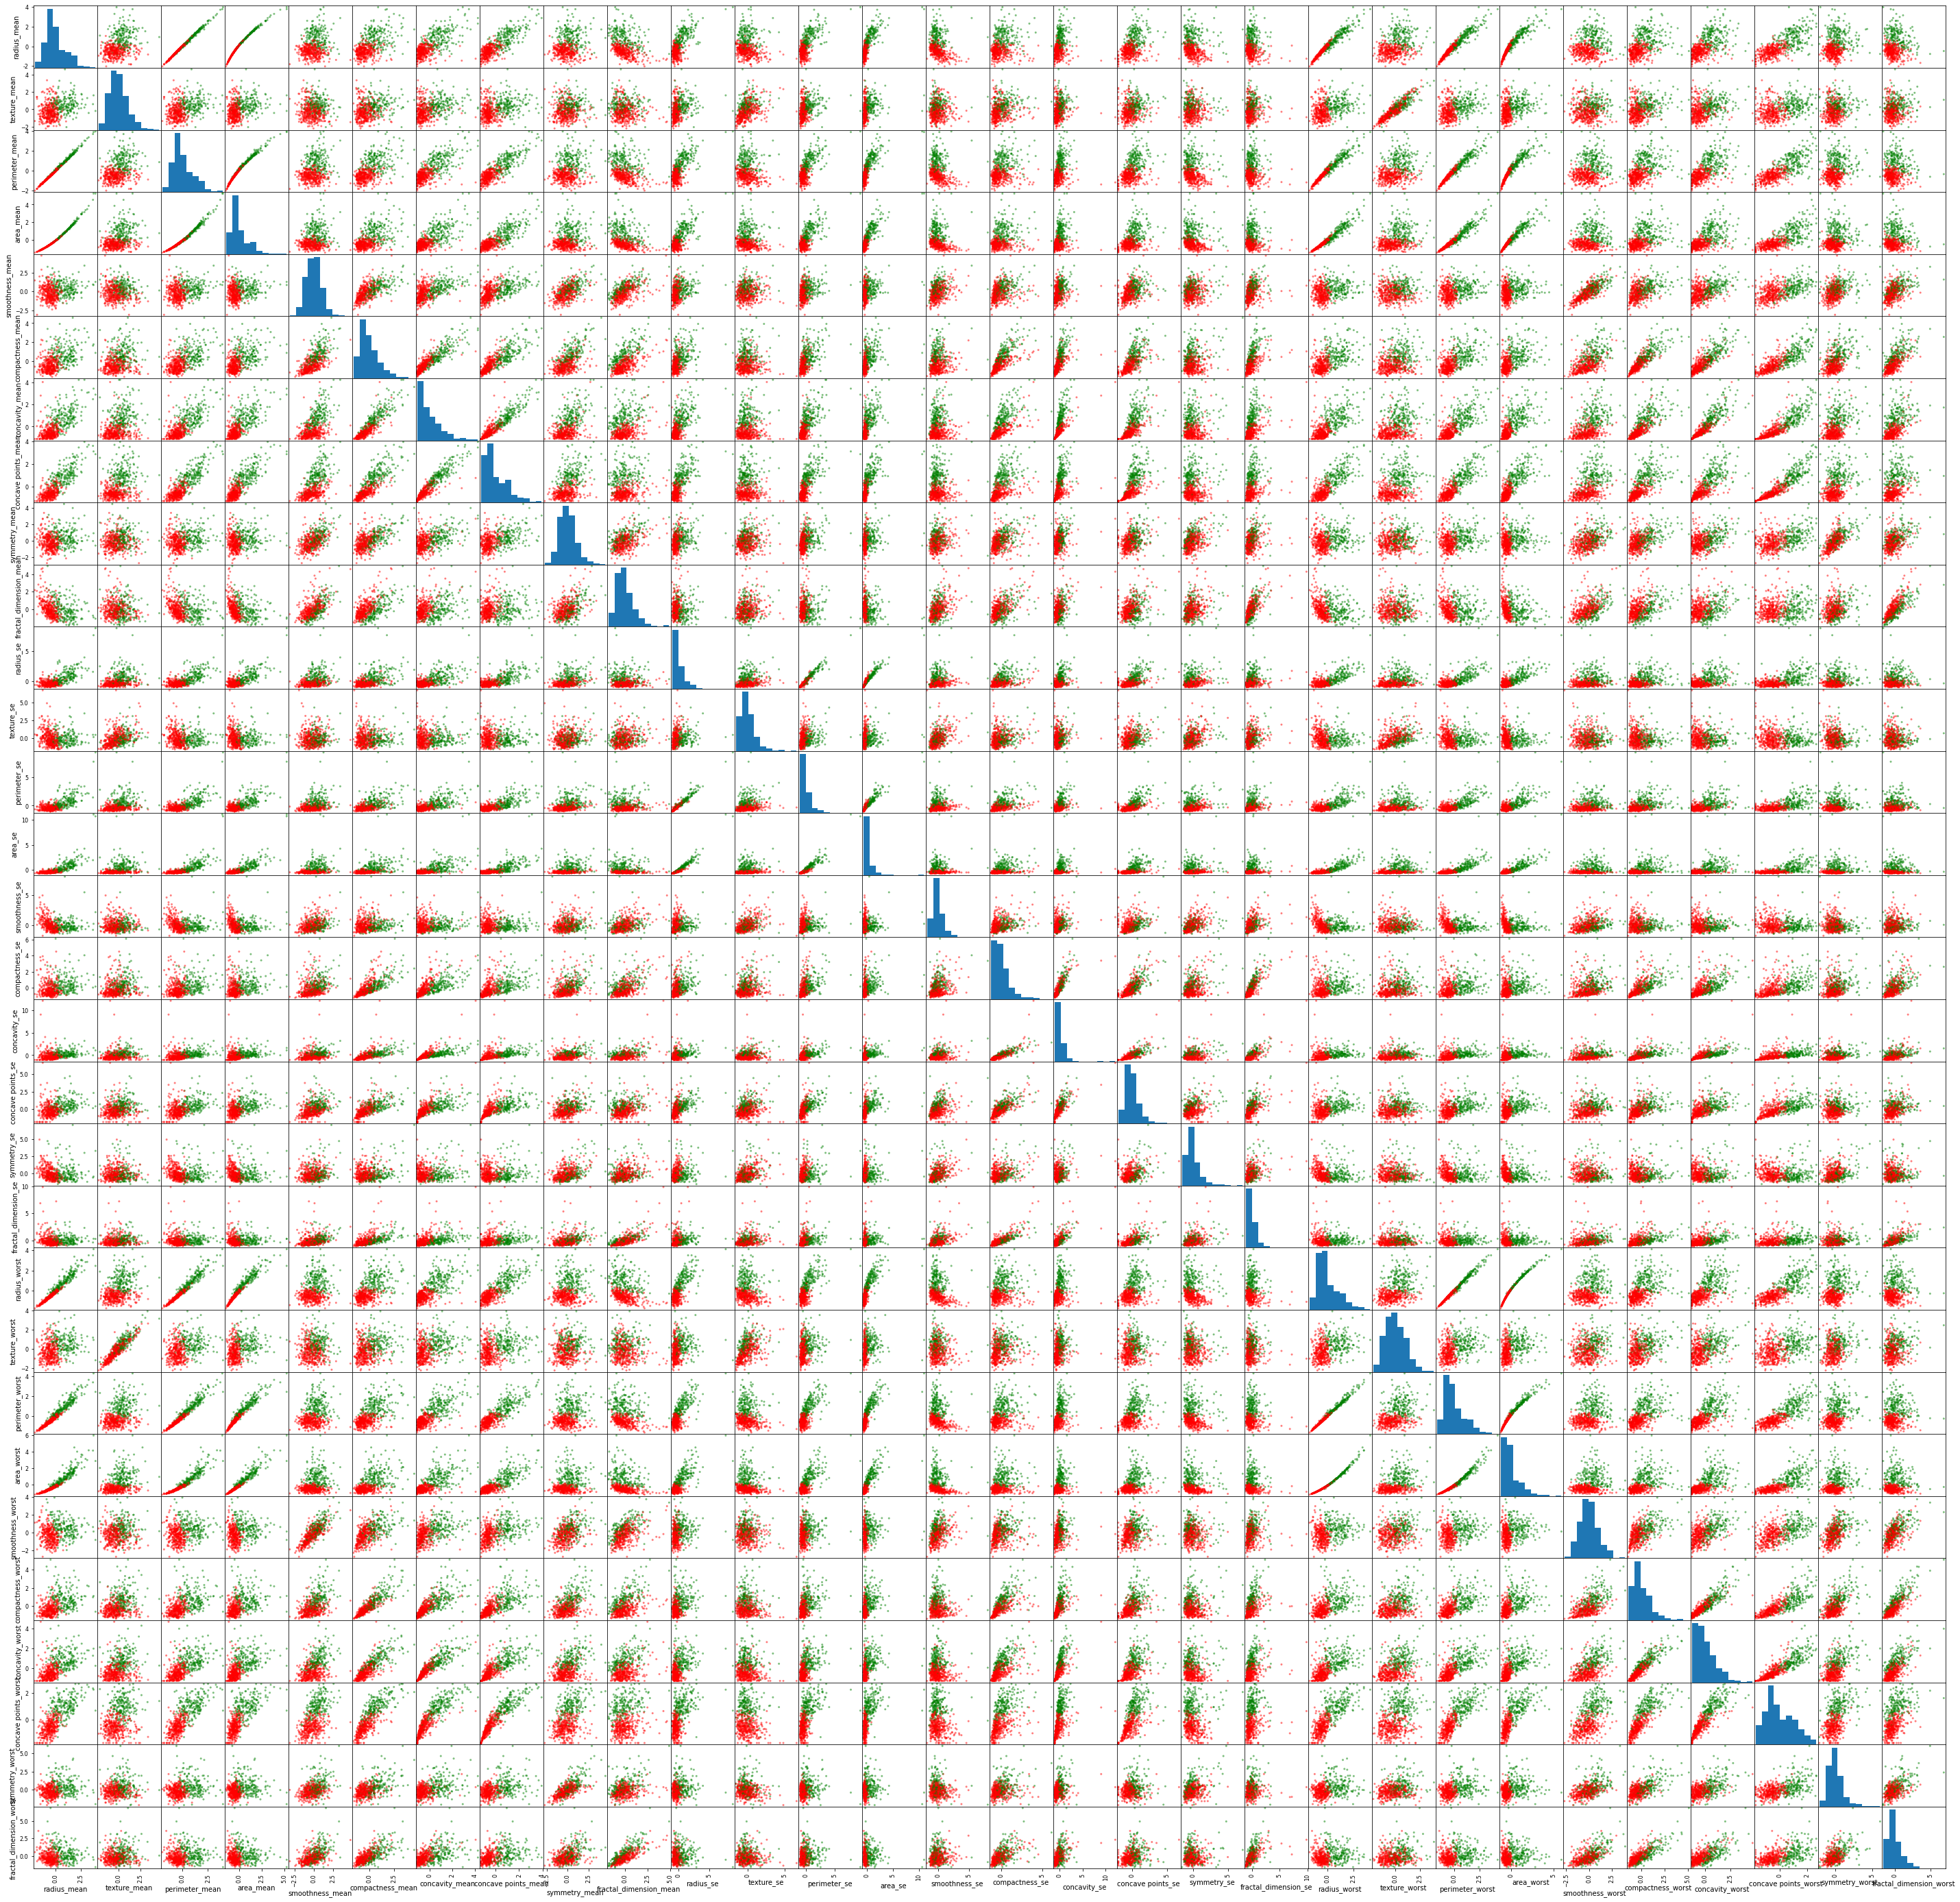

In [51]:
#### Or, we can plot all of them in one go
scatter_matrix(df, figsize =(50,50), diagonal='hist', c=colours)

array([[<AxesSubplot:title={'center':'area_mean'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'area_se'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'area_worst'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'compactness_mean'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'compactness_se'}, xlabel='[diagnosis]'>],
       [<AxesSubplot:title={'center':'compactness_worst'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'concave points_mean'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'concave points_se'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'concave points_worst'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'concavity_mean'}, xlabel='[diagnosis]'>],
       [<AxesSubplot:title={'center':'concavity_se'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'concavity_worst'}, xlabel='[diagnosis]'>,
        <AxesSubplot:title={'center':'fractal_di

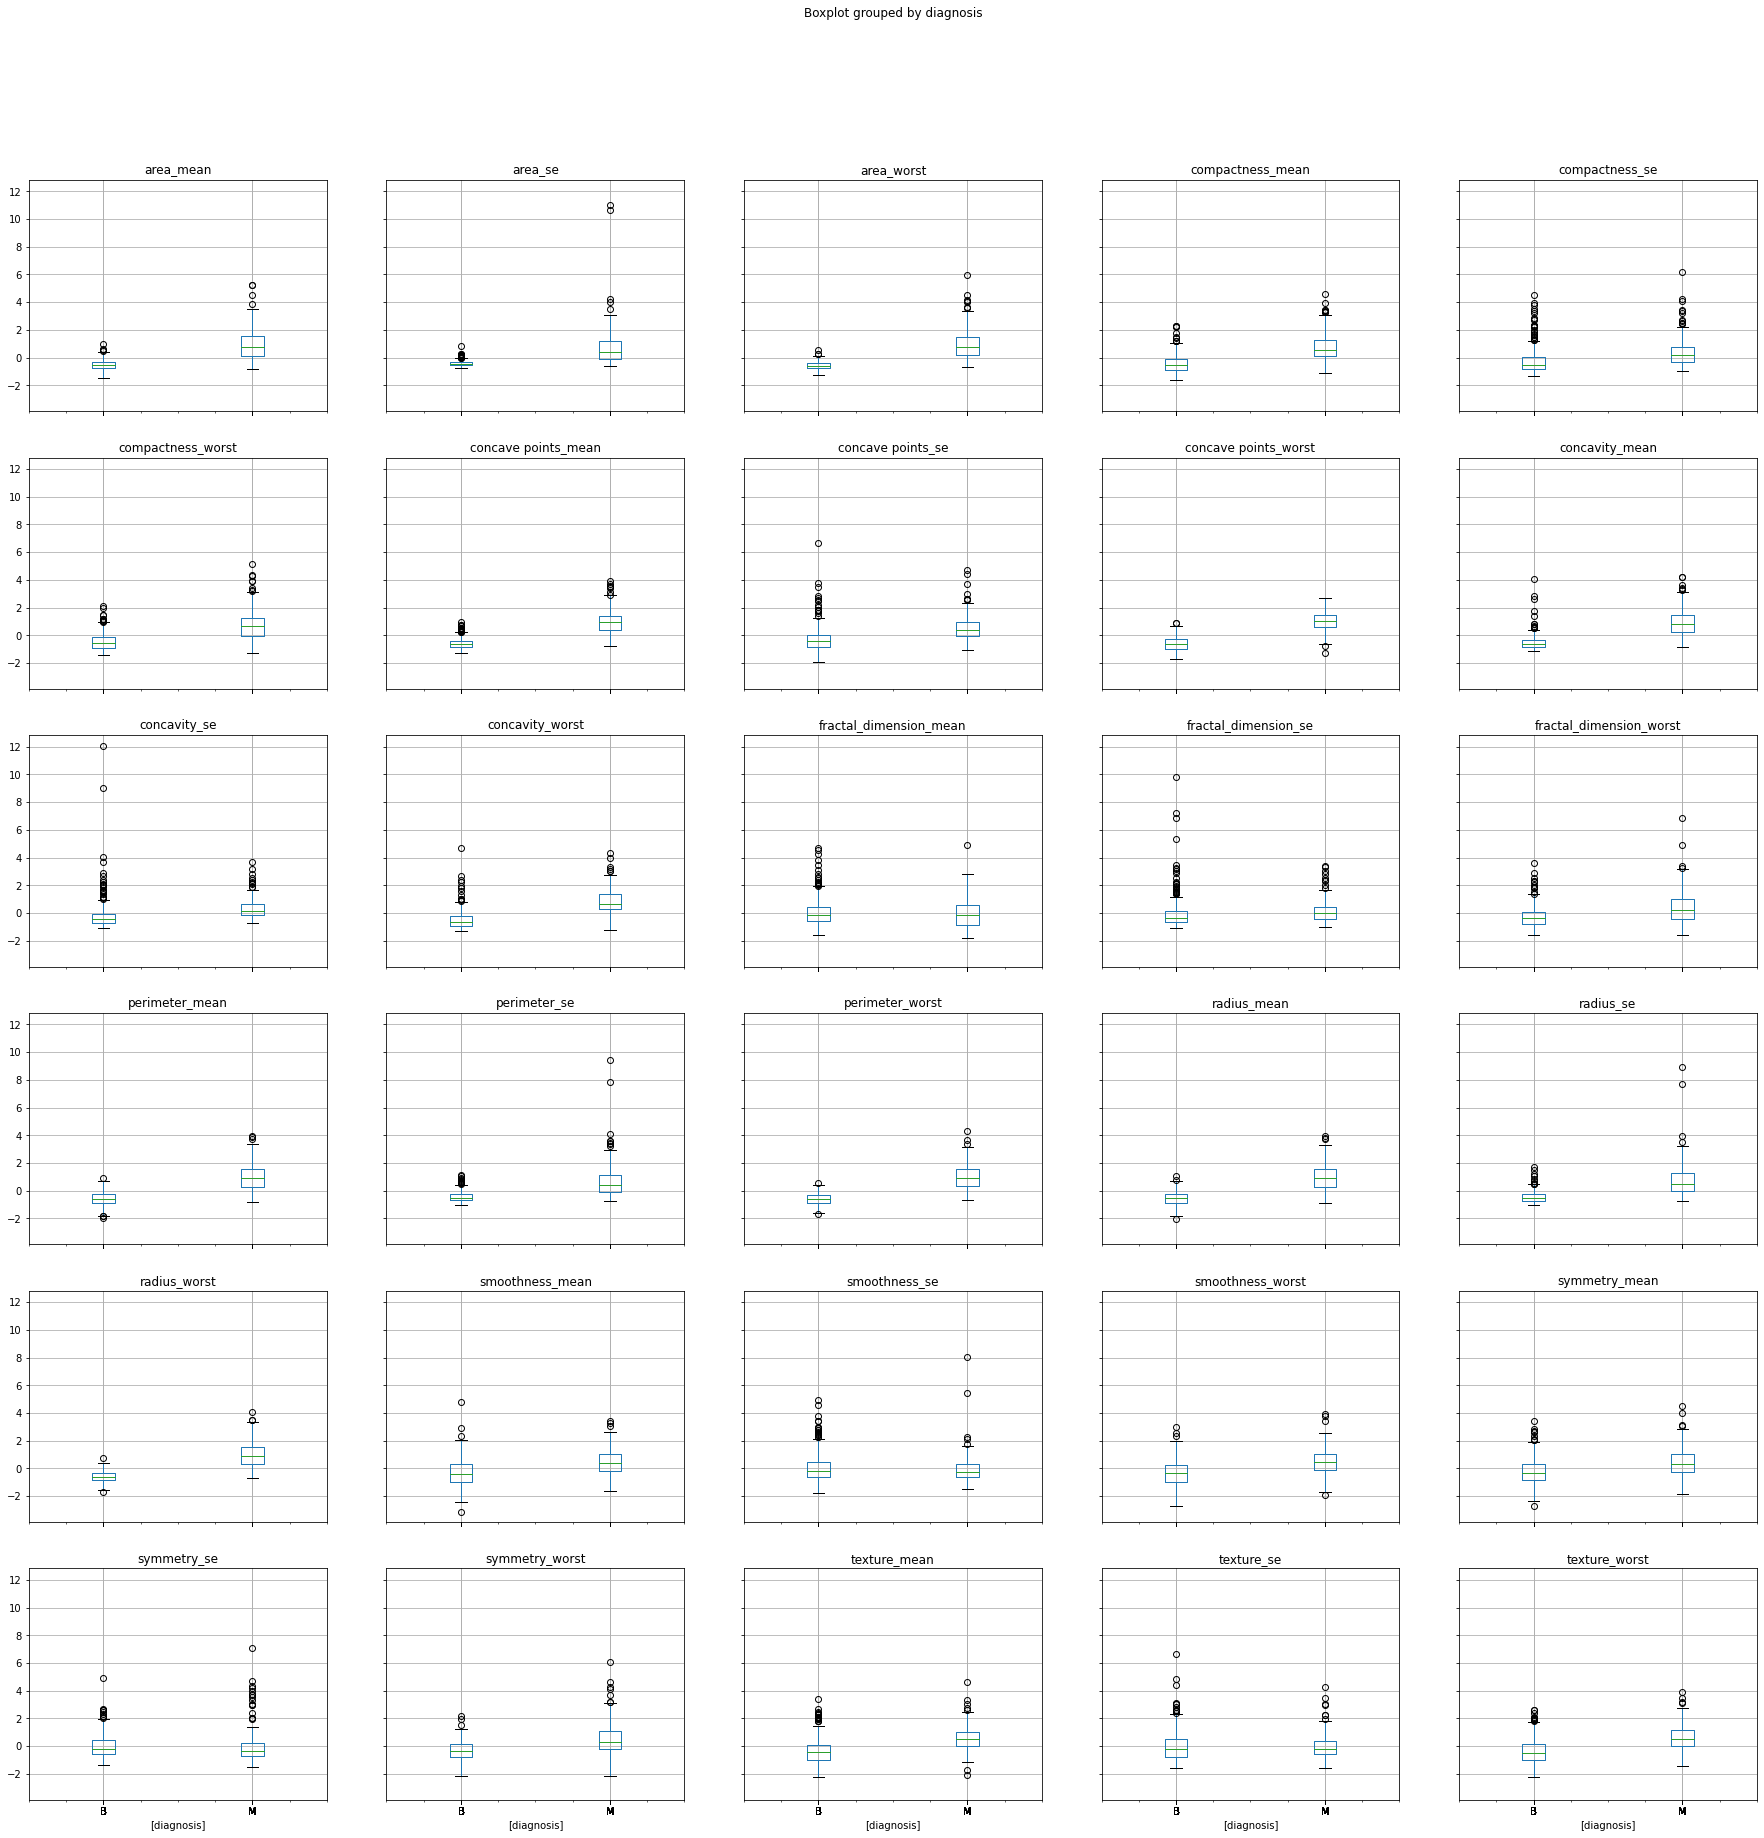

In [52]:
#### we can also plot a boxplot
df.boxplot(by='diagnosis', figsize=(30, 30))

#### A noticable shift of means can be seen in area_mean, area_worst, concave_points mean, concave_points worst, concavity_mean, concavity_worst, perimeter_mean, perimeter_worst, and radius_mean, radius_worst

## one hot encoding of categorical data
because some methods only work with numerical data. In order to use them we need to transform the target values into integers.

In [53]:
#transform the diagnosis to category type
df.diagnosis=df.diagnosis.astype('category')
df['diagnosis_encoded'],dict_cat=df.diagnosis.factorize()

print(dict_cat)

#recreate associated colour dictionary, just in case it will be needed
colour_dict_encoded={}
for i in range (0, 2):
      colour_dict_encoded[i]=colour_dict[dict_cat[i]]

CategoricalIndex(['M', 'B'], categories=['B', 'M'], ordered=False, dtype='category')


In [54]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                2.255747  ...         2.303601    2.001237          1.307686   
1               -0.868652  ...         1.535126    1.890489         -0.375612   
2               -0.398008  ...         1.347475    1.456285          0.527407   
3                4.910919  ...        -0.249939   -0.550021          3.394275   
4               -0.562450  ...         1.338539    1.220724          0.220556   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.616665         2.109526              2.296076        2.750622   
1          -0.430444        -0.146749              1.087084       -0.243890   
2           1.082932         0.854974              1.955000        1.152255   
3           3.893397         1.989588              2.175786        6.046041   
4          -0.313395         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  diagnosis  diagnosis_encoded  
0                 1.937015          M                  0  
1                 0.281190          M                  0  
2                 0.201391          M                  0  
3                 4.935010          M                  0  
4                -0.397100          M                  0  

[5 rows x 32 columns]

#### Now 0 represents type "M"  and   1 represents type "B"

## Begin Classification (firstly, with supervised method)

In [55]:
input_df = df.iloc[:,:30]
print(input_df.keys())
output_df = df.loc[:,'diagnosis_encoded']
output_df.head()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


0    0
1    0
2    0
3    0
4    0
Name: diagnosis_encoded, dtype: int64

#### Split the dataframe into train and test sets

In [56]:
from sklearn.model_selection import train_test_split

#Learning population is called train, the target value (species) t_train
#test population is called test, the predicted value t_test

X_train, X_test, y_train, y_test = train_test_split(input_df,output_df,test_size=0.2,random_state=0)

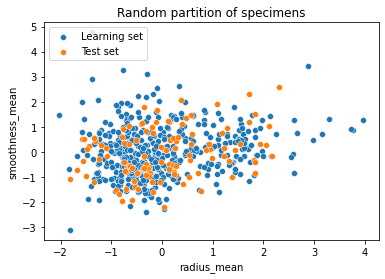

In [57]:
#### visualise partition of the two sets with some attribute
sns.scatterplot(x='radius_mean',y='smoothness_mean', data=X_train)
sns.scatterplot(x='radius_mean',y='smoothness_mean', data=X_test)

pl.xlabel('radius_mean')
pl.ylabel('smoothness_mean')
plt.legend( loc='upper left', labels=['Learning set', 'Test set'])
pl.title('Random partition of specimens') 


plt.show()

#### A good partition as the two sets have random allocation of the two attirubtes

array([[<AxesSubplot:xlabel='radius_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='texture_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='area_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='smoothness_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='compactness_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='concave points_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='symmetry_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='fractal_dimension_mean', ylabel='radius_mean'>],
       [<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>,
        <AxesSubplot:xlabel='texture_mean', ylabel='texture_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='texture_mean'>,
        <AxesSubplot:xlabel='area_mean', ylabel='texture_mean'>,
        <AxesSubplot:xlabel='smoot

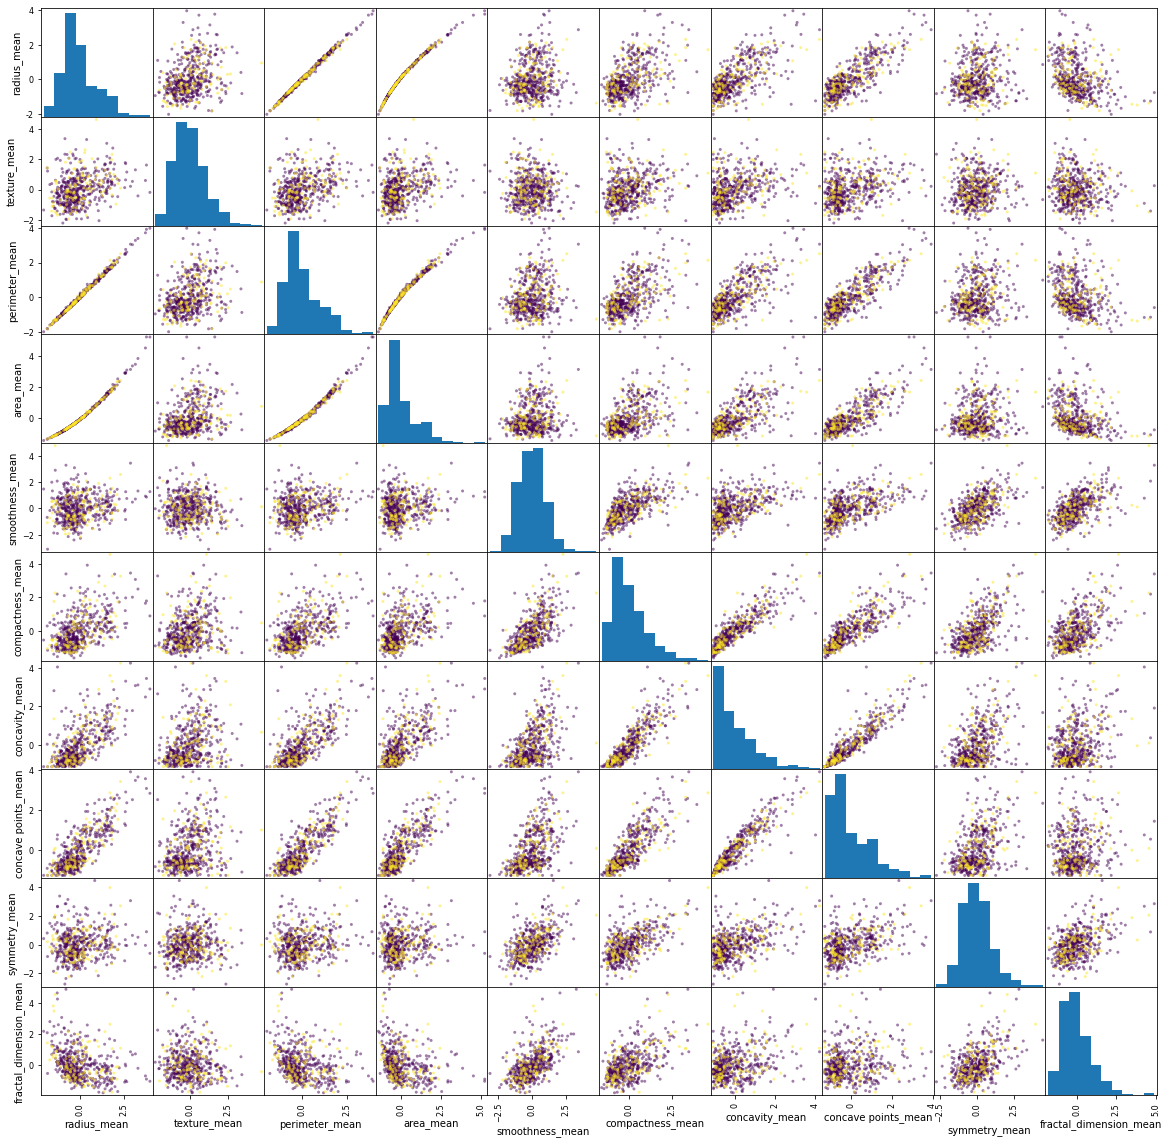

In [58]:
#### Do some more with the matrix, but not all

# Concatenate the dataframes and add a new column that identifies the sets
df_dummy = pd.concat([X_train.iloc[:,:10], X_test.iloc[:,:10]])
df_dummy['set'] = [0] * len(X_train.iloc[:,:10]) + [1] * len(X_test.iloc[:,:10])

# Plot the scatter matrix
scatter_matrix(df_dummy.iloc[:,:10], figsize=(20,20), diagonal='hist', c=df_dummy['set'])

#### There seems to be a good mix in general too, so we can move on to classification

### Gaussian Naive Bayes 

In [59]:
from sklearn.naive_bayes import GaussianNB

GNB_classifier = GaussianNB()

#Learning
GNB_classifier.fit(X_train,y_train)
#Preduction
y_hat_GNB =GNB_classifier.predict(X_test)

Text(0.5, 1.0, 'Predicted Types')

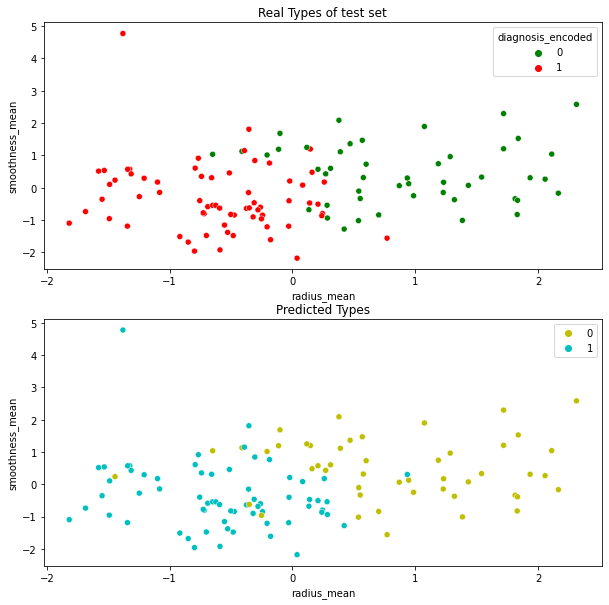

In [60]:
color_dict_prediction={0:'y',1:'c'}
figure = plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.subplot(211)
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue=y_test, palette=color_dict_encoded, data=X_test) 
plt.title('Real Types of test set')


plt.subplot(212)
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue=y_hat_GNB, palette=color_dict_prediction, data=X_test) 
plt.title('Predicted Types')


In [61]:
### Performance test
print (GNB_classifier.score(X_test,y_test))

0.9035087719298246


#### This performance score is the number of correct preductions divied by the number of specimens in the test set. It said that model can predict 90% of test data correctly

In [62]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_hat_GNB,y_test))

[[42  6]
 [ 5 61]]


Text(0, 0.5, 'Real Type')

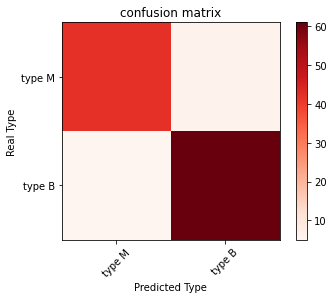

In [63]:
#### Color bar for visualisation of confusion matrix
plt.imshow(confusion_matrix(y_hat_GNB,y_test), interpolation='nearest', cmap=plt.cm.Reds)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(['type M','type B']))
plt.xticks(tick_marks,['type M','type B'], rotation =45)
plt.yticks(tick_marks,['type M','type B'])
plt.xlabel("Predicted Type")
plt.ylabel("Real Type")

0    42.0
1     6.0
2     5.0
3    61.0
Name: density, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

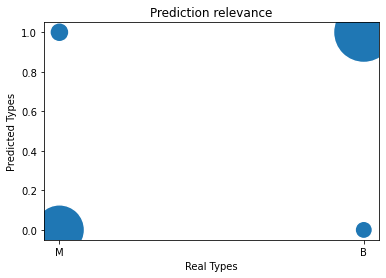

In [64]:
#### Bubble plot for visualisation of confusion matrix
conf = pd.DataFrame(columns=['real','real_Type','predicted_Type','density'])
for i in range (0, 2):
    for j in range (0,2) :
        if confusion_matrix(y_hat_GNB,y_test)[i][j]>0 :
            new_row = {'real':i, 'real_Type':dict_cat[i],'predicted_Type':j, 'density':float(confusion_matrix(y_hat_GNB,y_test)[i][j])}
            conf=conf.append(new_row, ignore_index = True)
            
print(conf.density)
sns.scatterplot(x='real_Type', y='predicted_Type', s=(conf.density)*60, data=conf) 
pl.xlabel('Real Types')
pl.ylabel('Predicted Types')
pl.title('Prediction relevance')
show

### K Nearest Neighbor(KNN)

In [65]:
from sklearn.model_selection import train_test_split
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(input_df,output_df,test_size=0.2,random_state=1)

print("X_train size :", X_train_KNN.shape, "  y_train size :", y_train_KNN.shape)
print("X_test size  :", X_test_KNN.shape, "  y_test size  :", y_test_KNN.shape)

X_train size : (455, 30)   y_train size : (455,)
X_test size  : (114, 30)   y_test size  : (114,)


In [66]:
#### Using KNN to train and then predict (with range of initial K)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train_KNN, y_train_KNN)
    y_hat_KNN = neigh.predict(X_test_KNN)
    mean_acc[n-1] = metrics.accuracy_score(y_test_KNN, y_hat_KNN)
    std_acc[n-1] = np.std(y_hat_KNN == y_test_KNN)/np.sqrt(y_hat_KNN.shape[0])

print('best accuracy :', mean_acc.max(), ' |  Best K is:', mean_acc.argmax()+1)

best accuracy : 0.956140350877193  |  Best K is: 2


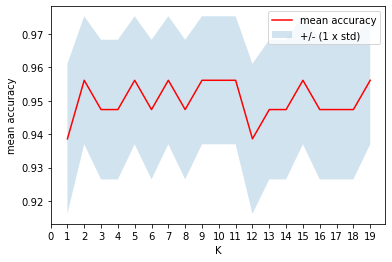

In [67]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.fill_between(range(1,Ks), mean_acc-(1*std_acc), mean_acc+(1*std_acc), alpha=0.2)

plt.xticks(np.arange(0,Ks, step=1))
plt.legend(("mean accuracy","+/- (1 x std)"))
plt.xlabel("K")
plt.ylabel("mean accuracy")
plt.show()

In [68]:
neigh_forTest = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train_KNN, y_train_KNN)
neigh_forTest

KNeighborsClassifier(n_neighbors=2)

### Decision Tree

In [69]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(input_df,output_df,test_size=0.2,random_state=2)

print("X_train size :", X_train_DT.shape, "  y_train size :", y_train_DT.shape)
print("X_test size  :", X_test_DT.shape, "  y_test size  :", y_test_DT.shape)

X_train size : (455, 30)   y_train size : (455,)
X_test size  : (114, 30)   y_test size  : (114,)


In [70]:
from sklearn.tree import DecisionTreeClassifier
Ks=200
mean_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train_DT, y_train_DT)
    pred_Tree = DecTree.predict(X_test_DT)
    mean_acc[n-1] = metrics.accuracy_score(y_test_DT, pred_Tree)

print('best accuracy :', mean_acc.max(), ' |  Best K is:', mean_acc.argmax()+1)

best accuracy : 0.9385964912280702  |  Best K is: 22


In [71]:
DecTree_forTest = DecisionTreeClassifier(criterion="entropy", max_depth=mean_acc.argmax()+1).fit(X_train_DT, y_train_DT)
DecTree_forTest

DecisionTreeClassifier(criterion='entropy', max_depth=22)

### Support Vector Machine

In [72]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(input_df,output_df,test_size=0.2,random_state=3)

print("X_train size :", X_train_SVM.shape, "  y_train size :", y_train_SVM.shape)
print("X_test size  :", X_test_SVM.shape, "  y_test size  :", y_test_SVM.shape)

X_train size : (455, 30)   y_train size : (455,)
X_test size  : (114, 30)   y_test size  : (114,)


In [73]:
from sklearn import svm
from sklearn.metrics import f1_score

kernel =['rbf','poly','linear','sigmoid']
f1score=np.zeros(len(kernel))
                  
for i,k in enumerate(kernel):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train_SVM, y_train_SVM)
    y_hat_SVM = clf.predict(X_test_SVM)
    f1score[i]=f1_score(y_test_SVM, y_hat_SVM, average='weighted')

print('best f1_score :', f1score.max(), ' |  Best K is:', kernel[f1score.argmax()])

best f1_score : 0.9736059629151035  |  Best K is: linear


In [74]:
clf_forTest = svm.SVC(kernel=kernel[f1score.argmax()]).fit(X_train_SVM, y_train_SVM)
clf_forTest

SVC(kernel='linear')

### Logsitic Regression

In [75]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(input_df,output_df,test_size=0.2,random_state=4)

print("X_train size :", X_train_LR.shape, "  y_train size :", y_train_LR.shape)
print("X_test size  :", X_test_LR.shape, "  y_test size  :", y_test_LR.shape)

X_train size : (455, 30)   y_train size : (455,)
X_test size  : (114, 30)   y_test size  : (114,)


In [76]:
from sklearn.linear_model import LogisticRegression

solver =['liblinear','newton-cg','lbfgs','sag','saga']
mean_acc=np.zeros(len(solver))
for n,s in enumerate(solver):
    LR = LogisticRegression(solver=s).fit(X_train_LR, y_train_LR)
    yhat = LR.predict(X_test_LR)
    mean_acc[n-1] = metrics.accuracy_score(y_test_LR, yhat)

print('best accuracy :', mean_acc.max(), ' |  Best solver is:', solver[mean_acc.argmax()])

best accuracy : 0.9649122807017544  |  Best solver is: liblinear


C:\Users\chonl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chonl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [77]:
LR_forTest = LogisticRegression(solver=solver[mean_acc.argmax()]).fit(X_train_LR, y_train_LR)
LR_forTest

LogisticRegression(solver='liblinear')

## Evaluation

In [78]:
from sklearn.metrics import classification_report

In [79]:
#GNB
y_hat_GNB_test = GNB_classifier.predict(X_test)
print("GNB_standard_report :\n",classification_report(y_hat_GNB_test, y_test, target_names=['Type M', 'Type B']))
print("\n")

#KNN
y_hat_KNN_test = neigh_forTest.predict(X_test_KNN)
print("KNN_standard_report :\n",classification_report(y_hat_KNN_test, y_test_KNN, target_names=['Type M', 'Type B']))
print("\n")

#DT
y_hat_DT_test = DecTree_forTest.predict(X_test_DT)
print("DecTree_standard_report :\n",classification_report(y_hat_DT_test, y_test_DT, target_names=['Type M', 'Type B']))
print("\n")

#SVM
y_hat_SVM_test = clf_forTest.predict(X_test_SVM)
print("SVM_standard_report :\n",classification_report(y_hat_SVM_test, y_test_SVM, target_names=['Type M', 'Type B']))
print("\n")

#LR
y_hat_LR_test = LR_forTest.predict(X_test_LR)
print("LR_standard_report :\n",classification_report(y_hat_LR_test, y_test_LR, target_names=['Type M', 'Type B']))

GNB_standard_report :
               precision    recall  f1-score   support

      Type M       0.89      0.88      0.88        48
      Type B       0.91      0.92      0.92        66

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



KNN_standard_report :
               precision    recall  f1-score   support

      Type M       0.95      0.93      0.94        43
      Type B       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



DecTree_standard_report :
               precision    recall  f1-score   support

      Type M       0.96      0.86      0.91        50
      Type B       0.90      0.97      0.93        64

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       1

#### where
- Precision : proportion of the class attributed rightfully
- Recall : proportion of elements of this class wrongfully attributed
- F1-Score: Harmonic mean of the 2 other indicators
- support : numbre of element of this class used in the test

#### SVM seems to have the best average accuracy overall and have the best balance in predicting the two type so it is selected for further analysis

### Cross Validation (with SVM)
To be relevant, the evaluation should be done in multiple pairs (learning set/test set). We can then use "Cross Validation". It split the initial population several times. The performance of the classfication is the mean of the several evaluations.

In [80]:
from sklearn.model_selection import cross_val_score

# cross validation with 6 iterations 
# note that we use the input_df and output_df without split this time

scores = cross_val_score(clf_forTest,input_df, output_df, cv=6)

print (scores)

[0.97894737 0.97894737 0.97894737 0.97894737 0.97894737 0.9787234 ]


In [81]:
from numpy import mean
print (mean(scores))

0.9789100410600972


#### It also has a very consistent peroformance over iteration, so we will name it a predictor

In [82]:
Predictor = clf_forTest

## Now we do Clustering (with unsupervised method)
unlabelled data will be created for thise exercise. Here we will use a classical clustering analysis method: k-mean, hierarchical, and DBSCAN.

In [83]:
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.metrics import completeness_score, homogeneity_score

### Kmeans clustering

C:\Users\chonl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


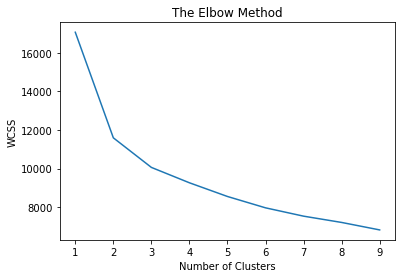

In [84]:
#### Here we will pretend like we don't know that there are two types to see how the elbow method will respond
range_n_clusters = range(1,10)
X_clustering = input_df

wcss=[]  # Within Cluster Sum of Squares 
for i in range_n_clusters:
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### There are sharp turns near 2 and 3 but it is hard to tell any difference

### Silhouette plots can also be used to estimate the number of clusters

For n_clusters = 2 The average silhouette_score is : 0.34338224069077805
For n_clusters = 3 The average silhouette_score is : 0.3143840098608098
For n_clusters = 4 The average silhouette_score is : 0.27168663427648826
For n_clusters = 5 The average silhouette_score is : 0.15995992038716095
For n_clusters = 6 The average silhouette_score is : 0.16225631788919712
For n_clusters = 7 The average silhouette_score is : 0.15370005438873832
For n_clusters = 8 The average silhouette_score is : 0.14440865960853927
For n_clusters = 9 The average silhouette_score is : 0.1494220641001539


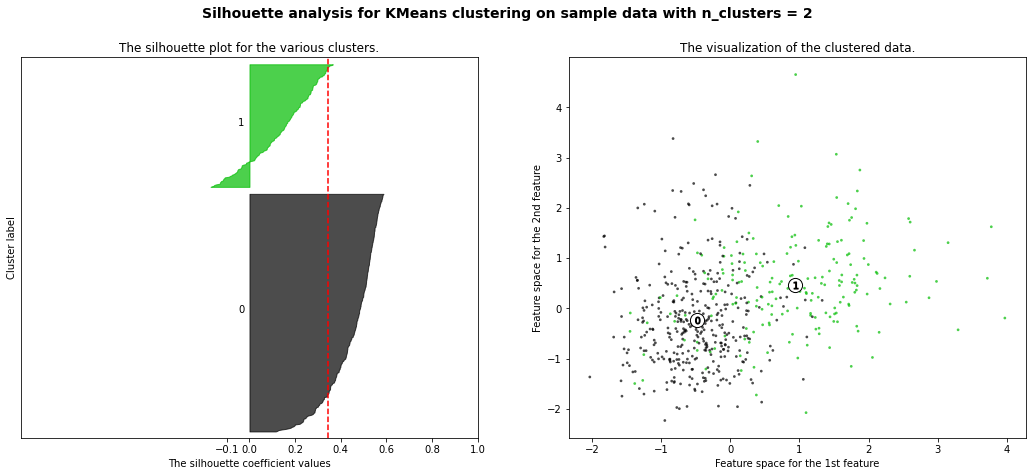

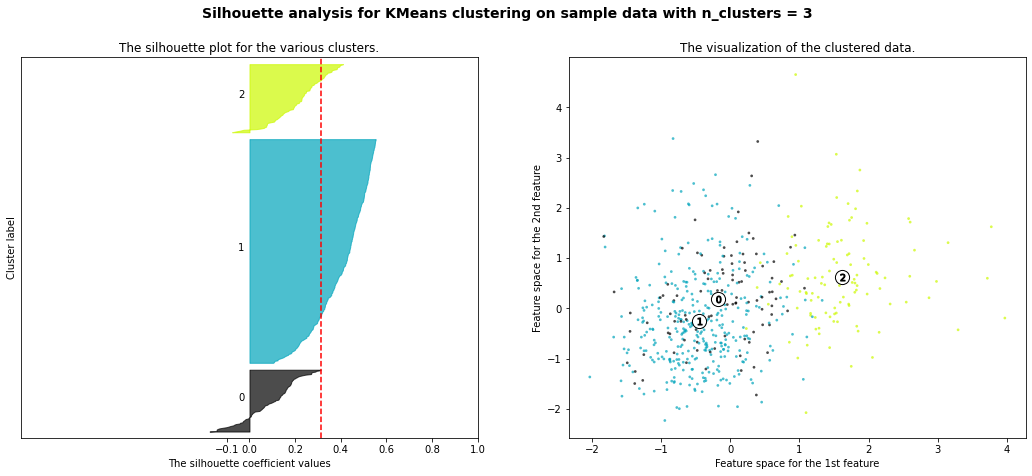

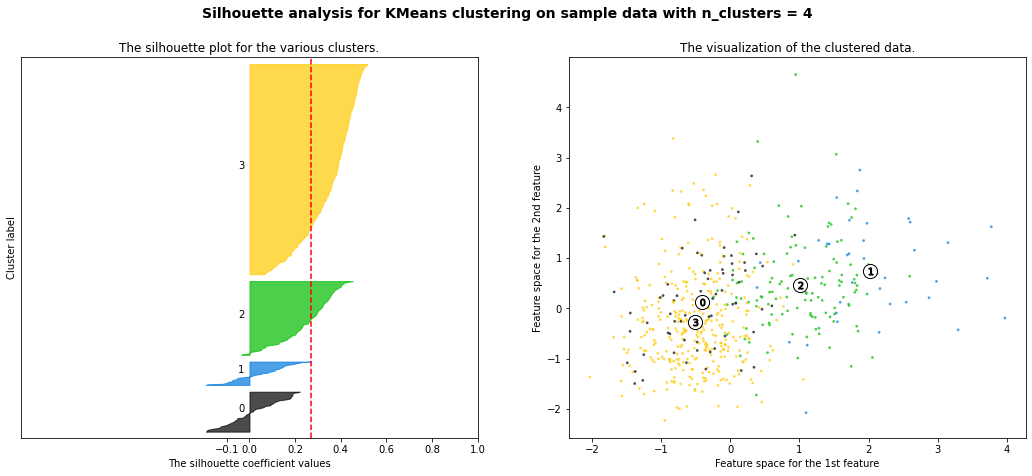

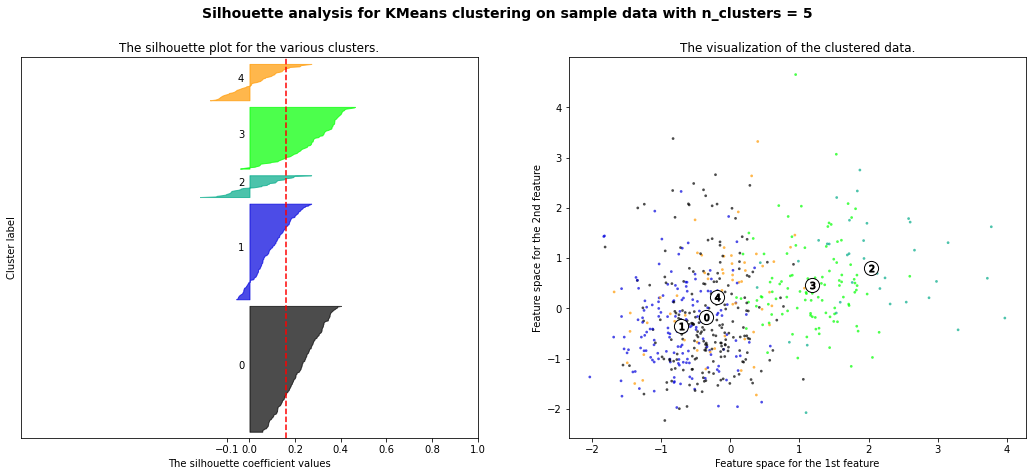

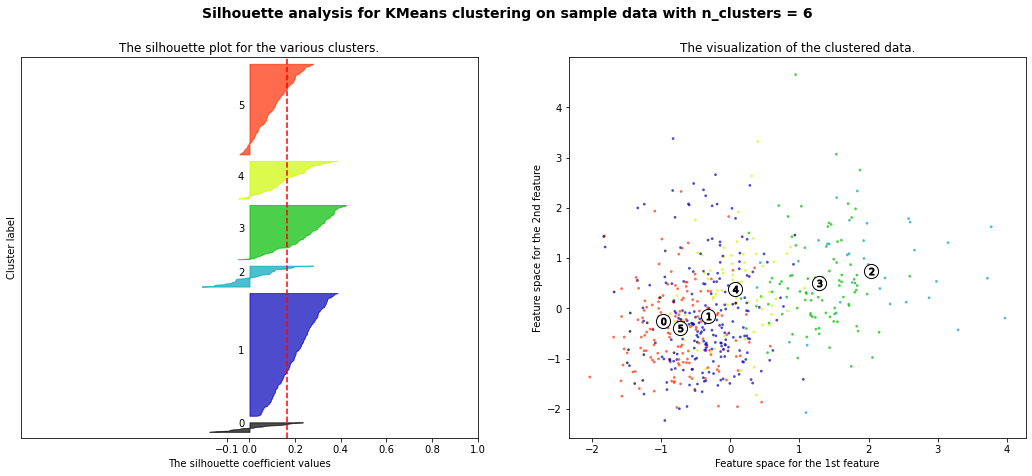

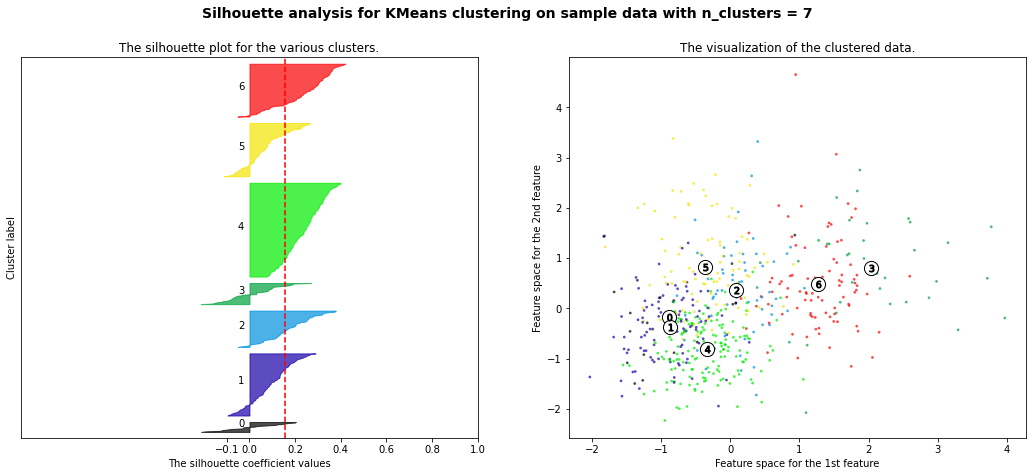

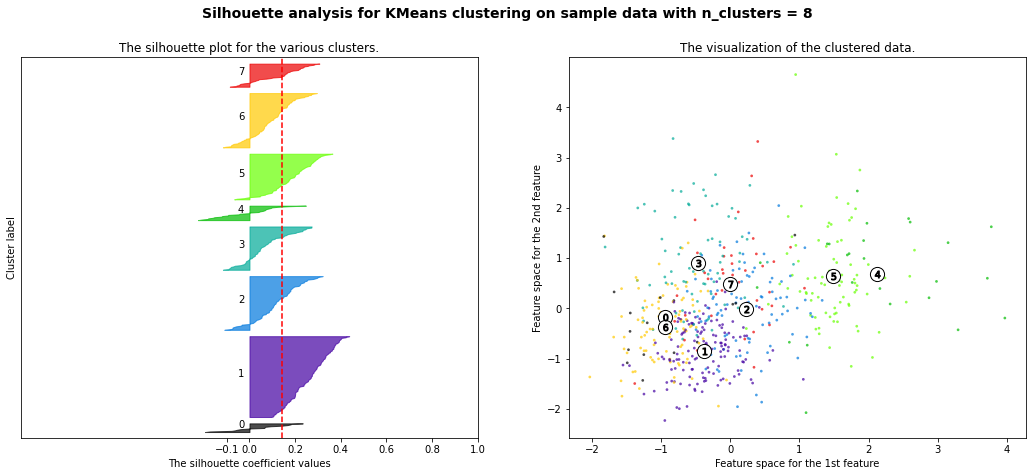

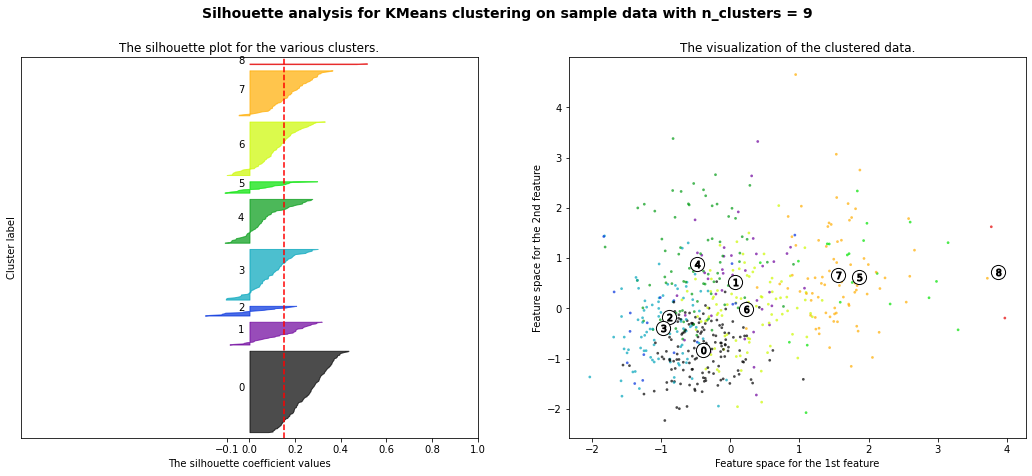

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colours = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colours, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### While the silhouette_score is not high, cluster = 2 is the best (considering all of them have negative values too)

In [86]:
### Let's use n=2 to do prediction
kmeans = KMeans(n_clusters=2, init='random') # initialization 
#K-means training
kmeans.fit(X_clustering) 
#actual prediction
y_hat_kmeans = kmeans.predict(X_clustering)


#We store the K-means results in a dataframe
predicted = pd.DataFrame(y_hat_kmeans)
predicted.columns = ['Prediction_kmean']
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#we merge this dataframe with df
Norm_df = pd.concat([df.iloc[:,:len(df.columns)-1],predicted], axis = 1)
print('Coordinates of the  2 centroids')
print(centroids)

Coordinates of the  2 centroids
[[ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
   1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
   0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
   0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
   0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]
 [-0.48442497 -0.23948977 -0.50066826 -0.47922799 -0.30302374 -0.50766196
  -0.56671617 -0.57922637 -0.30396101 -0.12545115 -0.4270387  -0.02125791
  -0.42787555 -0.40142988 -0.00848542 -0.34569618 -0.31677152 -0.38607654
  -0.06982168 -0.20642387 -0.51730476 -0.25182285 -0.53018015 -0.49893721
  -0.3025456  -0.47291642 -0.51940106 -0.57008917 -0.29713594 -0.30959659]]


In [87]:
Norm_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                2.255747  ...         2.303601    2.001237          1.307686   
1               -0.868652  ...         1.535126    1.890489         -0.375612   
2               -0.398008  ...         1.347475    1.456285          0.527407   
3                4.910919  ...        -0.249939   -0.550021          3.394275   
4               -0.562450  ...         1.338539    1.220724          0.220556   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.616665         2.109526              2.296076        2.750622   
1          -0.430444        -0.146749              1.087084       -0.243890   
2           1.082932         0.854974              1.955000        1.152255   
3           3.893397         1.989588              2.175786        6.046041   
4          -0.313395         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  diagnosis  Prediction_kmean  
0                 1.937015          M                 0  
1                 0.281190          M                 0  
2                 0.201391          M                 0  
3                 4.935010          M                 0  
4                -0.397100          M                 0  

[5 rows x 32 columns]

In [88]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                2.255747  ...         2.303601    2.001237          1.307686   
1               -0.868652  ...         1.535126    1.890489         -0.375612   
2               -0.398008  ...         1.347475    1.456285          0.527407   
3                4.910919  ...        -0.249939   -0.550021          3.394275   
4               -0.562450  ...         1.338539    1.220724          0.220556   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.616665         2.109526              2.296076        2.750622   
1          -0.430444        -0.146749              1.087084       -0.243890   
2           1.082932         0.854974              1.955000        1.152255   
3           3.893397         1.989588              2.175786        6.046041   
4          -0.313395         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  diagnosis  diagnosis_encoded  
0                 1.937015          M                  0  
1                 0.281190          M                  0  
2                 0.201391          M                  0  
3                 4.935010          M                  0  
4                -0.397100          M                  0  

[5 rows x 32 columns]

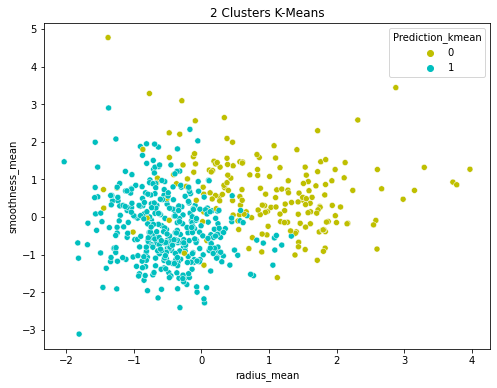

In [89]:
### let's vislualise the result
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='Prediction_kmean', palette=color_dict_prediction, data=Norm_df) 
pl.title('2 Clusters K-Means')
pl.show()

In [90]:
#### Now test the kmeans prediction to the real Types
print ('completeness_score: ',completeness_score(df['diagnosis_encoded'],Norm_df['Prediction_kmean']))
print ('homogeneity_score: ',homogeneity_score(df['diagnosis_encoded'],Norm_df['Prediction_kmean']))

completeness_score:  0.5653508768266774
homogeneity_score:  0.5442739102091959


#### Completeness is near to 1 when all elements of a class belong to the same cluster.
#### Homogeneity is near to 1 when all elements of a cluster belong to the same class.

The scores are actually not good which means there are many elements that should be in the same class but was put in different clusters and there also are many elements that should be in different class but was put in the same cluster

Text(0.5, 1.0, '2 Clusters K-Means')

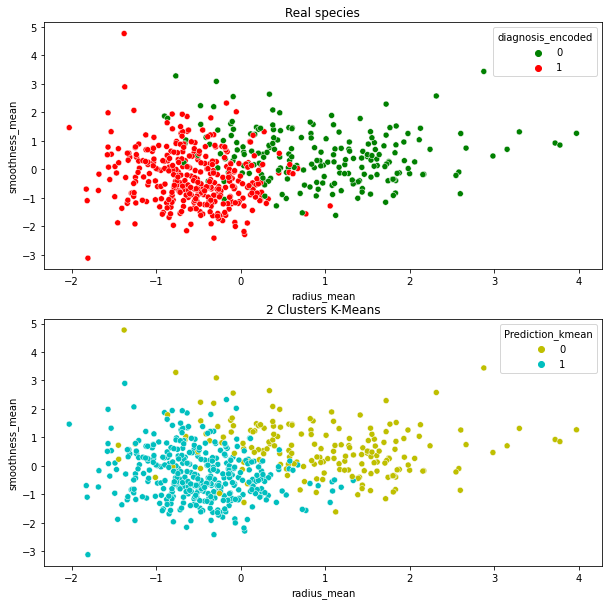

In [91]:
#### Once again let's visualise but compare to the real Types too
figure = plt.figure(figsize = (10, 10))
plt.tight_layout()

plt.figure(1)
plt.subplot(211)
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='diagnosis_encoded', palette=color_dict_encoded, data=df) 
plt.title('Real species')

plt.subplot(212)
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='Prediction_kmean', palette=color_dict_prediction, data=Norm_df) 
plt.title('2 Clusters K-Means')

### Hierarchical clustering

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

X_hc = X_clustering

method =['single','complete','average','ward']
mean_ch_hc=np.zeros(len(method))
c_score_hc=np.zeros(len(method))
h_score_hc=np.zeros(len(method))
for n,m in enumerate(method):
    Z = linkage(X_hc, method=m, metric='euclidean')
    hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=m)
    y_hat_hc = hierarchical_cluster.fit_predict(X_hc)
    c_score_hc[n-1] = completeness_score(df['diagnosis_encoded'],y_hat_hc)
    h_score_hc[n-1] = homogeneity_score(df['diagnosis_encoded'],y_hat_hc)
    mean_ch_hc[n-1] = (c_score_hc[n-1]+h_score_hc[n-1])/2

print('best average completeness & homogeneity :', mean_ch_hc.max(), ' |  Best method is:', method[mean_ch_hc.argmax()])
print ('completeness_score: ',c_score_hc[mean_ch_hc.argmax()])
print ('homogeneity_score: ',h_score_hc[mean_ch_hc.argmax()])

best average completeness & homogeneity : 0.457177857292166  |  Best method is: average
completeness_score:  0.46814184767130673
homogeneity_score:  0.44621386691302517


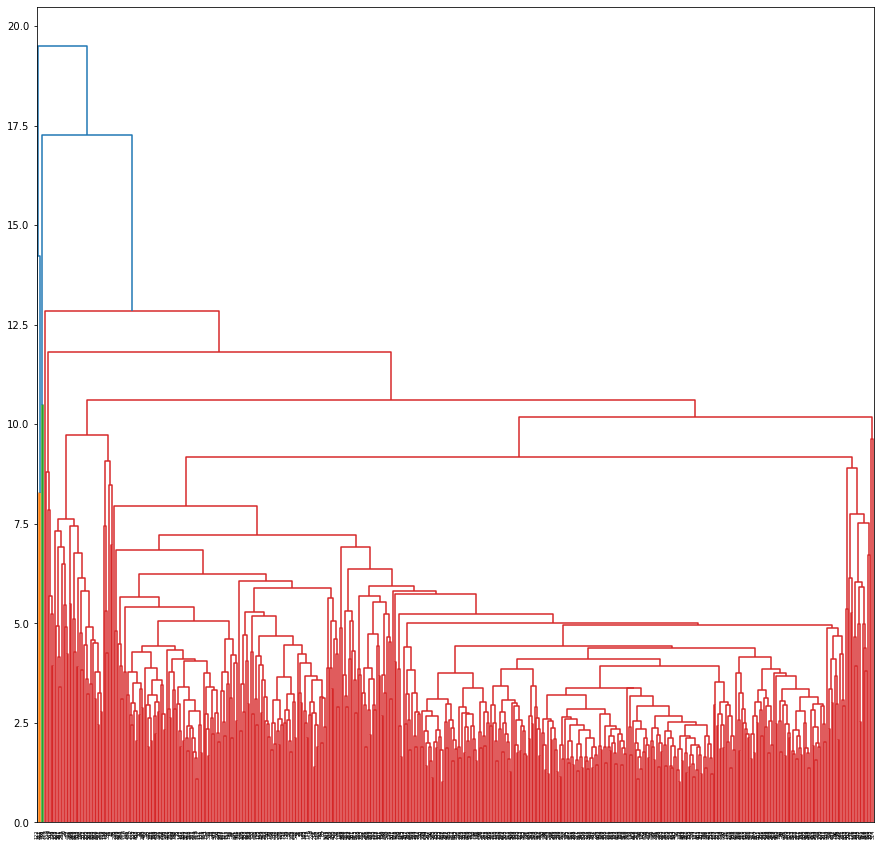

In [94]:
### visualisation of Hierarchical clustering method with dendrogram
Z_data = linkage(X_hc, method=method[mean_ch_hc.argmax()], metric='euclidean')
plt.figure(figsize=(15, 15))
dendrogram(Z_data)
plt.show()

In [95]:
HC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=method[mean_ch_hc.argmax()])
HC

AgglomerativeClustering(linkage='average')

### DBSCAN

In [96]:
X_DBS = X_clustering
C=np.arange(3,2, step=-0.001).tolist()
Ks=len(C)
mean_ch_dbs=np.zeros(Ks-1)
c_score_dbs=np.zeros(Ks-1)
h_score_dbs=np.zeros(Ks-1)
for n in range(1,Ks):
    dbscan = DBSCAN(eps=C[n-1], min_samples=20).fit(X_DBS)
    y_hat_DBS = dbscan.labels_
    c_score_dbs[n-1] = completeness_score(df['diagnosis_encoded'],y_hat_DBS)
    h_score_dbs[n-1] = homogeneity_score(df['diagnosis_encoded'],y_hat_DBS)
    mean_ch_dbs[n-1] = (c_score_dbs[n-1]+h_score_dbs[n-1])/2

print('best average completeness & homogeneity :', mean_ch_dbs.max(), ' |  Best c is:', C[mean_ch_dbs.argmax()])
print ('completeness_score: ',c_score_dbs[mean_ch_dbs.argmax()])
print ('homogeneity_score: ',h_score_dbs[mean_ch_dbs.argmax()])

best average completeness & homogeneity : 0.30281656808646495  |  Best c is: 2.6210000000000417
completeness_score:  0.2956199651409796
homogeneity_score:  0.31001317103195036


In [98]:
dbscan = DBSCAN(eps=C[mean_ch_dbs.argmax()], min_samples=2).fit(X_DBS)
dbscan

DBSCAN(eps=2.6210000000000417, min_samples=2)

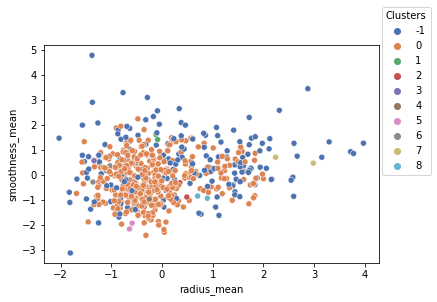

In [99]:
p = sns.scatterplot(data=X_DBS, x='radius_mean', y='smoothness_mean', hue=dbscan.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

#### It's quite clear that DBSCAN is not a suitale method for this problem

## Evaluation

In [100]:
#Kmeans
y_hat_Kmeans_test = kmeans.predict(X_clustering)
print("Kmeans_standard_report :\n",classification_report(y_hat_Kmeans_test, output_df, target_names=['Type M', 'Type B']))
print("\n")

#HC
y_hat_HC_test = HC.fit_predict(X_hc)
print("HC_standard_report :\n",classification_report(y_hat_HC_test, output_df, target_names=['Type M', 'Type B']))
print("\n")

Kmeans_standard_report :
               precision    recall  f1-score   support

      Type M       0.83      0.93      0.87       189
      Type B       0.96      0.90      0.93       380

    accuracy                           0.91       569
   macro avg       0.89      0.91      0.90       569
weighted avg       0.92      0.91      0.91       569



HC_standard_report :
               precision    recall  f1-score   support

      Type M       0.99      0.37      0.54       566
      Type B       0.00      0.00      0.00         3

    accuracy                           0.37       569
   macro avg       0.49      0.18      0.27       569
weighted avg       0.98      0.37      0.53       569





#### From the standard report, it is clear that Kmeans is the most suitable method and it acheived an average accuracy of around 90%

0    175.0
1     14.0
2     37.0
3    343.0
Name: density, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

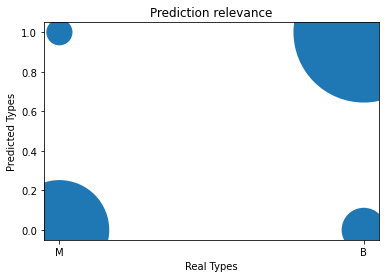

In [101]:
#### Visualise the performance of Kmeans with Bubble plot

conf = pd.DataFrame(columns=['real','real_Type','predicted_Type','density'])
for i in range (0, 2):
    for j in range (0,2) :
        if confusion_matrix(y_hat_Kmeans_test,output_df)[i][j]>0 :
            new_row = {'real':i, 'real_Type':dict_cat[i],'predicted_Type':j, 'density':float(confusion_matrix(y_hat_Kmeans_test,output_df)[i][j])}
            conf=conf.append(new_row, ignore_index = True)
            
print(conf.density)
sns.scatterplot(x='real_Type', y='predicted_Type', s=(conf.density)*60, data=conf) 
pl.xlabel('Real Types')
pl.ylabel('Predicted Types')
pl.title('Prediction relevance')
show

#### The kmeans model predict 
- M as M coorectly 176 samples,
- M as B wrongly 18 samples,
- B as M wrongly 36 samples,
- B as B correctly 339 samples